# Trump 新聞資料分析

### 主題：  
分析 BBCnews 上搜尋關鍵字「Trump」所出現的新聞中，內容經常出現的字詞有哪些。

In [98]:
import pickle
import re
import time
import io
import os
import json
import pandas as pd
from optparse import OptionParser
from pandas import DataFrame, read_csv
path='./data/'

In [99]:
with open('bbc_trump', 'rb') as file:
    news = pickle.load(file)

print(news)

[{'time': '5 Nov 2018', 'title': 'Panorama: Trump: What Next?', 'summary': "…Will President Trump be forced out of office? On the eve of the most important… US midterm elections for a generation, Panorama examines allegations that Trump… tomorrow, it could open the door to impeachment, but Trump's supporters believe…", 'doc': "On the eve of the most important US midterm elections for a generation, Panorama examines allegations that Trump colluded with Russia to win the presidency.Will President Trump be forced out of office? On the eve of the most important US midterm elections for a generation, Panorama examines allegations that Trump colluded with Russia to win the presidency, and looks at the similarities with the Watergate scandal which brought down Richard Nixon. Reporter Hilary Andersson joins the campaign trail in West Virginia, where the president's message of a vast political witch-hunt against him has fired up Republican voters. If the Democrats do well tomorrow, it could ope

In [100]:
news_df = pd.DataFrame(news)
news_df = news_df[['time', 'title', 'summary', 'doc']]
news_df.head()

,time,title,summary,doc
0,5 Nov 2018,Panorama: Trump: What Next?,…Will President Trump be forced out of office?...,On the eve of the most important US midterm el...
1,16 Jul 2018,Trump: A Very British Welcome?,…As Trump touches down for his first President...,As Trump touches down for his first Presidenti...
2,26 Mar 2019,"HARDtalk: George Papadopoulos, Former Trump Ca...",…Stephen Sackur speaks to former Trump campaig...,Stephen Sackur speaks to former Trump campaign...
3,6 May 2019,World Snooker Championship: John Higgins pots ...,… chases a maximum break against Judd Trump in...,John Higgins pots an incredible double before ...
4,9 Jul 2018,Panorama: Trump: Is the President a Sex Pest?,…Donald Trump has been accused of sexually ina...,What is the truth about Donald Trump's behavio...


In [101]:
pd.to_pickle(news_df, 'news_df.pkl')

with open('news_df.pkl', 'rb') as fout:
    allData = pickle.load(fout)
allData.head()

,time,title,summary,doc
0,5 Nov 2018,Panorama: Trump: What Next?,…Will President Trump be forced out of office?...,On the eve of the most important US midterm el...
1,16 Jul 2018,Trump: A Very British Welcome?,…As Trump touches down for his first President...,As Trump touches down for his first Presidenti...
2,26 Mar 2019,"HARDtalk: George Papadopoulos, Former Trump Ca...",…Stephen Sackur speaks to former Trump campaig...,Stephen Sackur speaks to former Trump campaign...
3,6 May 2019,World Snooker Championship: John Higgins pots ...,… chases a maximum break against Judd Trump in...,John Higgins pots an incredible double before ...
4,9 Jul 2018,Panorama: Trump: Is the President a Sex Pest?,…Donald Trump has been accused of sexually ina...,What is the truth about Donald Trump's behavio...


In [102]:
corpus = allData['doc'].values.tolist()

In [103]:
# TF-IDF
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()
print(word)

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

['00', '000', '10', '11', '12', '120', '13', '135', '14', '1400', '141', '157', '16', '17', '18', '18m', '1917', '1948', '20', '2010', '2016', '2017', '2018', '2019', '2020', '21st', '25', '26', '30pm', '40', '400', '44', '45', '45th', '50', '500', '544', '550bc', '60', '737', 'aakriti', 'ababa', 'abdullah', 'about', 'above', 'abroad', 'abuse', 'academic', 'accept', 'access', 'accords', 'account', 'accusations', 'accused', 'accuses', 'achieng', 'achieved', 'acknowledge', 'aclu', 'acquaintances', 'across', 'action', 'actions', 'active', 'activism', 'activist', 'activists', 'activities', 'actor', 'actually', 'adam', 'adding', 'addis', 'additional', 'address', 'addressing', 'administration', 'admission', 'advantage', 'advice', 'adviser', 'advisers', 'advisor', 'advisory', 'advocate', 'affect', 'afghan', 'afghanistan', 'african', 'after', 'again', 'against', 'age', 'agenda', 'ago', 'agreement', 'ahead', 'ahmed', 'aid', 'aide', 'air', 'airlines', 'al', 'alan', 'alaoudh', 'albums', 'algarve'

In [104]:
len(corpus)

119

In [105]:
features = tfidf.toarray()
labels = allData['title'].values
labels

array(['Panorama: Trump: What Next?', 'Trump: A Very British Welcome?',
       'HARDtalk: George Papadopoulos, Former Trump Campaign Adviser',
       'World Snooker Championship: John Higgins pots incredible double against Judd Trump',
       'Panorama: Trump: Is the President a Sex Pest?',
       "HARDtalk: Mica Mosbacher - Adviser to President Trump's 2020 campaign",
       'World Snooker Championship: Judd Trump showboats his way to a 135 break',
       'World Snooker Championship: Trump reaches final with stylish win over Wilson - best shots',
       'Snooker: World Championship: 2019: 2019 - Live: Wilson v Trump',
       'World Snooker: Gary Wilson misses simple red in semi-final against Judd Trump',
       'Snooker: World Championship: 2019: 2019 - Live: G Wilson v Trump',
       'Snooker: World Championship: 2019: 2019 - Live: G Wilson v Trump',
       'World Snooker Championship: Judd Trump eases past Stephen Maguire to reach semis',
       'Snooker: World Championship: 2019: 2

In [106]:
textFrame = pd.DataFrame(features, columns = word)
textFrame.head()
len(features)

119

In [107]:
allF = features.flatten()   # 折疊成一維
nonZero = allF[np.nonzero(allF)]   # 返回非零數值
m = np.median(nonZero)

In [108]:
allF[np.nonzero(allF)]

array([0.07745985, 0.02902094, 0.1706401 , ..., 0.06563859, 0.12699487,
       0.18019707])

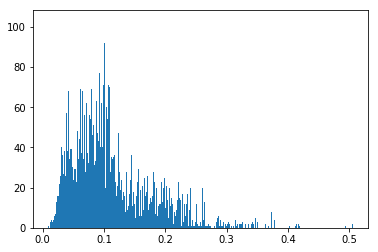

0.09868539809718777

In [109]:
plt.hist(nonZero, bins=500)  # bins: bar數量
plt.show()
m

In [110]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [111]:
for i in range(len(features)):
    print(dataset[i])

['allegations', 'colluded', 'down', 'elections', 'eve', 'examines', 'generation', 'important', 'midterm', 'most', 'of', 'panorama', 'presidency', 'russia', 'the', 'to', 'will', 'win', 'with']
['as', 'bbc', 'behind', 'ben', 'britain', 'course', 'crazy', 'down', 'far', 'first', 'for', 'go', 'goes', 'gone', 'lovers', 'one', 'over', 'presidential', 'reporter', 'scenes', 'the', 'think', 'those', 'three', 'too', 'touches', 'trump', 'uk', 'visit', 'weekend', 'well', 'will', 'young', 'zand']
['advisor', 'aside', 'be', 'campaign', 'cloud', 'convicted', 'evaporated', 'exoneration', 'first', 'former', 'george', 'horizon', 'massive', 'member', 'mueller', 'papadopoulos', 'posturing', 'probe', 'result', 'robert', 'russians', 'sackur', 'speaks', 'stephen', 'the', 'to', 'trump', 'was']
['135', 'against', 'an', 'before', 'black', 'break', 'breakavailable', 'championship', 'chases', 'double', 'final', 'higgins', 'incredible', 'john', 'judd', 'maximum', 'missing', 'more', 'only', 'pots', 'showboats', 'sn

In [112]:
#!pip install mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,00,000,10,11,12,13,135,14,1400,141,...,yemen,yet,york,you,young,zand,zealand,zeid,zeinab,zurcher
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,True,False,False,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [113]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsupp = 0.1   # setting threshold
apriori(df, min_support = minsupp, use_colnames=True)

,support,itemsets
0,0.109244,(2019)
1,0.109244,(about)
2,0.100840,(all)
3,0.243697,(and)
4,0.100840,(at)
5,0.159664,(championship)
6,0.176471,(coverage)
7,0.126050,(crucible)
8,0.100840,(episodes)
9,0.159664,(from)


In [114]:
result = apriori(df, min_support = minsupp)
result

,support,itemsets
0,0.109244,(20)
1,0.109244,(35)
2,0.100840,(82)
3,0.243697,(107)
4,0.100840,(149)
5,0.159664,(276)
6,0.176471,(373)
7,0.126050,(388)
8,0.100840,(502)
9,0.159664,(602)


In [115]:
rules = association_rules(result, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20),(276),0.109244,0.159664,0.109244,1.000000,6.263158,0.091801,inf
1,(388),(20),0.126050,0.109244,0.100840,0.800000,7.323077,0.087070,4.453782
2,(20),(388),0.109244,0.126050,0.100840,0.923077,7.323077,0.087070,11.361345
3,(20),(1373),0.109244,0.176471,0.109244,1.000000,5.666667,0.089965,inf
4,(82),(502),0.100840,0.100840,0.100840,1.000000,9.916667,0.090672,inf
5,(502),(82),0.100840,0.100840,0.100840,1.000000,9.916667,0.090672,inf
6,(82),(602),0.100840,0.159664,0.100840,1.000000,6.263158,0.084740,inf
7,(82),(743),0.100840,0.226891,0.100840,1.000000,4.407407,0.077961,inf
8,(82),(1322),0.100840,0.100840,0.100840,1.000000,9.916667,0.090672,inf
9,(1322),(82),0.100840,0.100840,0.100840,1.000000,9.916667,0.090672,inf


In [116]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20),(276),0.109244,0.159664,0.109244,1.000000,6.263158,0.091801,inf
1,(276),(20),0.159664,0.109244,0.109244,0.684211,6.263158,0.091801,2.820728
2,(388),(20),0.126050,0.109244,0.100840,0.800000,7.323077,0.087070,4.453782
3,(20),(388),0.109244,0.126050,0.100840,0.923077,7.323077,0.087070,11.361345
4,(20),(1373),0.109244,0.176471,0.109244,1.000000,5.666667,0.089965,inf
5,(1373),(20),0.176471,0.109244,0.109244,0.619048,5.666667,0.089965,2.338235
6,(82),(502),0.100840,0.100840,0.100840,1.000000,9.916667,0.090672,inf
7,(502),(82),0.100840,0.100840,0.100840,1.000000,9.916667,0.090672,inf
8,(82),(602),0.100840,0.159664,0.100840,1.000000,6.263158,0.084740,inf
9,(602),(82),0.159664,0.100840,0.100840,0.631579,6.263158,0.084740,2.440576


In [117]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(20),(276),0.109244,0.159664,0.109244,1.000000,6.263158,0.091801,inf,1
1,(276),(20),0.159664,0.109244,0.109244,0.684211,6.263158,0.091801,2.820728,1
2,(388),(20),0.126050,0.109244,0.100840,0.800000,7.323077,0.087070,4.453782,1
3,(20),(388),0.109244,0.126050,0.100840,0.923077,7.323077,0.087070,11.361345,1
4,(20),(1373),0.109244,0.176471,0.109244,1.000000,5.666667,0.089965,inf,1


In [118]:
out = rules[(rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 7.5) ]
out

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
134,"(82, 602)",(502),0.100840,0.100840,0.10084,1.000000,9.916667,0.090672,inf,2
136,"(602, 502)",(82),0.100840,0.100840,0.10084,1.000000,9.916667,0.090672,inf,2
141,"(82, 743)",(502),0.100840,0.100840,0.10084,1.000000,9.916667,0.090672,inf,2
142,"(502, 743)",(82),0.100840,0.100840,0.10084,1.000000,9.916667,0.090672,inf,2
146,"(82, 1322)",(502),0.100840,0.100840,0.10084,1.000000,9.916667,0.090672,inf,2
147,"(82, 502)",(1322),0.100840,0.100840,0.10084,1.000000,9.916667,0.090672,inf,2
148,"(1322, 502)",(82),0.100840,0.100840,0.10084,1.000000,9.916667,0.090672,inf,2
152,"(82, 1484)",(502),0.100840,0.100840,0.10084,1.000000,9.916667,0.090672,inf,2
154,"(1484, 502)",(82),0.100840,0.100840,0.10084,1.000000,9.916667,0.090672,inf,2
160,"(602, 743)",(82),0.109244,0.100840,0.10084,0.923077,9.153846,0.089824,11.689076,2


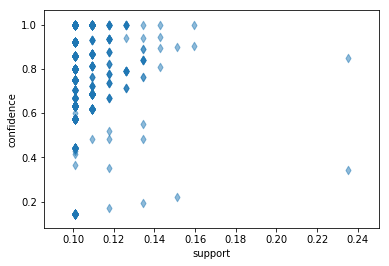

In [125]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="d")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [120]:
print(len(rules))
rules['antecedents'].head()

2766


0     (20)
1    (276)
2    (388)
3     (20)
4     (20)
Name: antecedents, dtype: object

In [121]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(allData)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

In [122]:
nodeList = allData.index[allData['title']].tolist()
#nodeListB = allData.index[allData['docClass'] == 'environ'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeList, node_color="b", node_size=1000)
#nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display


IndexError: arrays used as indices must be of integer (or boolean) type

In [123]:
# 小群體
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{(20, 276),
 (82, 502),
 (107, 1040),
 (388, 373),
 (743, 1322),
 (885, 1657),
 (1348, 1615),
 (1373, 602),
 (1392, 1299),
 (1484, 788)}

In [124]:
pd.DataFrame(df.columns)

,0
0,00
1,000
2,10
3,11
4,12
5,13
6,135
7,14
8,1400
9,141


## 小結
</b> 